# Support Vector Machines (SVM)

Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection.

The advantages of support vector machines are:

- Effective in high dimensional spaces.
- Still effective in cases where number of dimensions is greater than the number of samples.
- Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.
- Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.

The disadvantages of support vector machines include:

- If the number of features is much greater than the number of samples, avoid over-fitting in choosing Kernel functions and regularization term is crucial.
- SVMs do not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation.

The support vector machines in scikit-learn support both dense (`numpy.ndarray` and convertible to that by `numpy.asarray`) and sparse (any `scipy.sparse`) sample vectors as input. However, to use an SVM to make predictions for sparse data, it must have been fit on such data. For optimal performance, use C-ordered `numpy.ndarray` (dense) or `scipy.sparse.csr_matrix` (sparse) with `dtype=float64`.

## Classification

SVC, NuSVC and LinearSVC are classes capable of performing binary and multi-class classification on a dataset.

SVC and NuSVC are similar methods, but accept slightly different sets of parameters and have different mathematical formulations. On the other hand, LinearSVC is another (faster) implementation of Support Vector Classification for the case of a linear kernel. Note that **LinearSVC does not accept parameter** `kernel`, as this is **assumed to be linear**. It also lacks some of the attributes of SVC and NuSVC, like `support_`.

As other classifiers, SVC, NuSVC and LinearSVC take as input two arrays: an array `X` of shape `(n_samples, n_features)` holding the training samples, and an array `y` of class labels (strings or integers), of shape `(n_samples)`:

In [3]:
import numpy as np
from sklearn import svm
X = np.array([[0,0],[1,1]])
y = np.array([0,1])
clf = svm.SVC()
clf.fit(X,y)

SVC()

After being fitted, the model can then be used to predict new values:

In [7]:
clf.predict([[2.,2.]])

array([1])

SVMs decision function depends on some subset of the training data, called the support vectors. Some properties of these support vectors can be found in attributes `support_vectors_`, `support_` and `n_support_`:

In [8]:
# get support vectors
clf.support_vectors_

array([[0., 0.],
       [1., 1.]])

In [9]:
# get indices of support vectors
clf.support_

array([0, 1], dtype=int32)

In [10]:
# get number of support vectors for each class
clf.n_support_

array([1, 1], dtype=int32)

### Examples

### SVM: Maximum margin separating hyperplane
Plot the maximum margin separating hyperplane within a two-class separable dataset using a Support Vector Machine classifier with linear kernel.

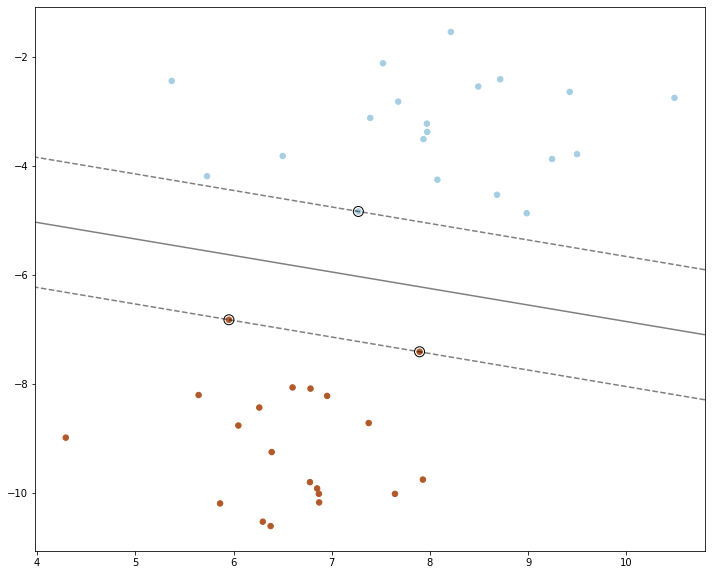

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

# create 40 separable points
X,y = make_blobs(n_samples=40, centers=2, random_state=6)

# fit the model, don't regularize for illustration purposes
# C : float, default=1.0
# Regularization parameter. The strength of the regularization is 
# inversely proportional to C. Must be strictly positive. 
# The penalty is a squared l2 penalty.
clf = svm.SVC(kernel='linear', C=1000) #hence no regularization
clf.fit(X,y)

plt.figure(figsize=(12,10))

# y is 
# array([1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 
#        1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1]) 
# it works as a vector of colors
plt.scatter(X[:,0], X[:,1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
# Get the current Axes instance on the current figure matching 
# the given keyword args, or create one.
ax = plt.gca()
xlim = ax.get_xlim() # -> (xmin, xmax)
ylim = ax.get_ylim()

# create a grid to evaluate the model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
XX, YY = np.meshgrid(xx, yy)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(
    XX, YY, Z, colors='k', levels=[-1,0,1], alpha=0.5, linestyles=['--','-','--']
)

# plot the support vector, the contour of the points
ax.scatter(
    clf.support_vectors_[:,0],
    clf.support_vectors_[:,1],
    s=100, linewidth=1, facecolors="none",edgecolors='k',
)

plt.show()

In [28]:
Z.shape

(30, 30)

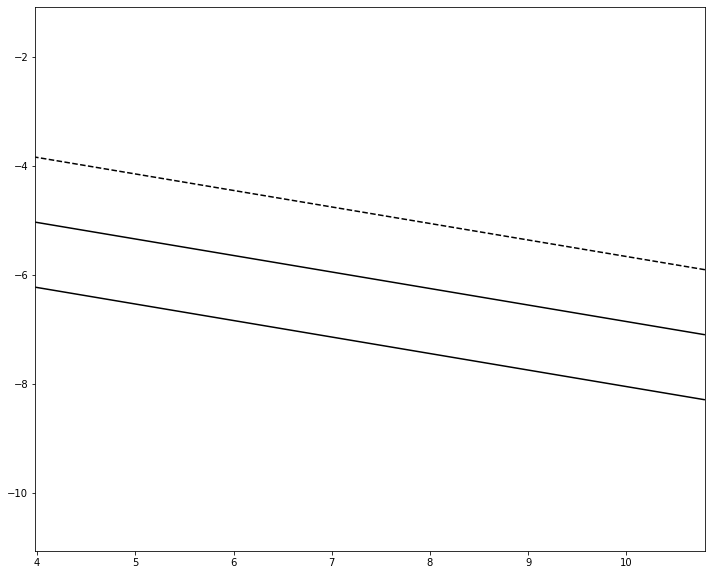

In [78]:
plt.figure(figsize=(12,10))
# plt.contour(
#     XX, YY, Z, colors='k', levels=[-1,0,1], alpha=0.5, linestyles=['--','-','--']
# )
# plt.contour(XX, YY, Z, colors='k', levels=[1])
# plt.contour(XX, YY, Z, colors='k', levels=[0])
# plt.contour(XX, YY, Z, colors='k', levels=[-1])
plt.show()

In [50]:
Z[0]

array([5.05332914, 4.99363837, 4.9339476 , 4.87425683, 4.81456607,
       4.7548753 , 4.69518453, 4.63549376, 4.57580299, 4.51611223,
       4.45642146, 4.39673069, 4.33703992, 4.27734916, 4.21765839,
       4.15796762, 4.09827685, 4.03858608, 3.97889532, 3.91920455,
       3.85951378, 3.79982301, 3.74013224, 3.68044148, 3.62075071,
       3.56105994, 3.50136917, 3.44167841, 3.38198764, 3.32229687])

In [53]:
XX[0]

array([ 3.98244784,  4.21747704,  4.45250625,  4.68753546,  4.92256466,
        5.15759387,  5.39262307,  5.62765228,  5.86268149,  6.09771069,
        6.3327399 ,  6.5677691 ,  6.80279831,  7.03782752,  7.27285672,
        7.50788593,  7.74291513,  7.97794434,  8.21297355,  8.44800275,
        8.68303196,  8.91806116,  9.15309037,  9.38811958,  9.62314878,
        9.85817799, 10.09320719, 10.3282364 , 10.56326561, 10.79829481])

In [55]:
YY[0]

array([-11.06847196, -11.06847196, -11.06847196, -11.06847196,
       -11.06847196, -11.06847196, -11.06847196, -11.06847196,
       -11.06847196, -11.06847196, -11.06847196, -11.06847196,
       -11.06847196, -11.06847196, -11.06847196, -11.06847196,
       -11.06847196, -11.06847196, -11.06847196, -11.06847196,
       -11.06847196, -11.06847196, -11.06847196, -11.06847196,
       -11.06847196, -11.06847196, -11.06847196, -11.06847196,
       -11.06847196, -11.06847196])

In [62]:
print(clf.support_vectors_[:,0])
print(clf.support_vectors_[:,1])

[7.27059007 5.95313618 7.89359985]
[-4.84225716 -6.82945967 -7.41655113]


### Non-linear SVM
Perform binary classification using non-linear SVC with RBF kernel. The target to predict is a XOR of the inputs.

The color map illustrates the decision function learned by the SVC

/var/folders/2q/7qslh1r50qv5dxqpmmm9jcy00000gn/T/ipykernel_1840/2176359032.py:30: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contour(xx,yy,Z, levels=[0], colors='k', linewidth=2, linestyles='dashed')


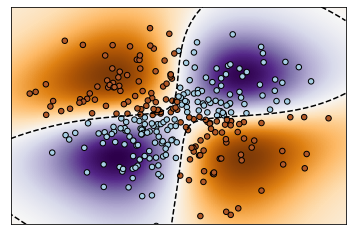

In [111]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm


xx, yy = np.meshgrid(np.linspace(-3,3,500), np.linspace(-3,3,500))

np.random.seed(0)

#create 300,2 points
X = np.random.randn(300,2) 
Y = np.logical_xor(X[:,0] > 0, X[:,1] > 0) #pos-pos/neg-neg -> False, True otherwise

# fit the model
clf = svm.NuSVC(gamma='auto')
clf.fit(X, Y)

# plot the decision function for each datapoint on the grid
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.imshow(
    Z, interpolation='nearest',
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    aspect='auto',
    origin='lower',
    cmap=plt.cm.PuOr_r
)
# plot contours
plt.contour(xx,yy,Z, levels=[0], colors='k', linewidth=2, linestyles='dashed')
# plot data points
plt.scatter(X[:,0], X[:,1], s=30, c=Y, edgecolors='k', cmap=plt.cm.Paired)

# remove x_ticks, y_ticks
plt.xticks(())
plt.yticks(())

# xmin, xmax, ymin, ymax = axis([xmin, xmax, ymin, ymax])
plt.axis([-3,3,-3,3])
plt.show()

/var/folders/2q/7qslh1r50qv5dxqpmmm9jcy00000gn/T/ipykernel_1840/222925084.py:1: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contour(xx,yy,Z, levels=[-2,-1,0,1,2], colors='k', linewidth=2, linestyles='dashed')


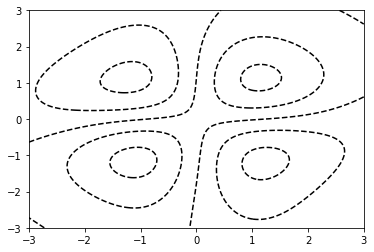

In [105]:
plt.contour(xx,yy,Z, levels=[-2,-1,0,1,2], colors='k', linewidth=2, linestyles='dashed')


In [91]:
Y

array([False, False,  True,  True,  True, False, False, False,  True,
        True,  True,  True,  True,  True, False, False, False,  True,
       False, False, False,  True, False,  True, False,  True, False,
        True, False, False, False, False,  True,  True,  True, False,
        True,  True, False,  True,  True,  True, False,  True,  True,
        True, False, False, False, False,  True,  True,  True, False,
       False, False,  True,  True,  True, False,  True, False, False,
        True, False,  True,  True,  True,  True,  True,  True, False,
       False,  True, False,  True, False, False,  True, False,  True,
       False,  True, False, False, False,  True,  True, False,  True,
       False, False,  True,  True,  True,  True, False,  True, False,
       False, False, False,  True, False,  True, False,  True, False,
        True,  True, False,  True,  True, False, False, False,  True,
        True,  True, False, False, False, False, False, False,  True,
        True, False,

### SVM-Anova: SVM with univariate feature selection
*Anova: Analysis of Variance*

This example shows how to perform univariate feature selection before running a SVC (support vector classifier) to improve the classification scores. We use the iris dataset (4 features) and add 36 non-informative features. We can find that our model achieves best performance when we select around 10% of features.

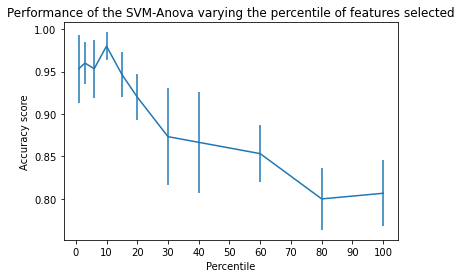

In [128]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

np.random.seed(0)
# Import data
X,y = load_iris(return_X_y = True)
# Add non-informative features
X = np.hstack((X, 2*np.random.random((X.shape[0], 36)))) 
# this adds 36 random features X.shape -> (150,40)

# Create a feature-selection transform, a scaler and an instance of SVM 
# that we combine together to have a full-blown estimator
clf = Pipeline(
    [
        ('anova', SelectPercentile(chi2)),
        ('scaler', StandardScaler()),
        ('svc', SVC(gamma='auto')),
    ]
)

# Plot the cross-validation score as a function of percentile of features
score_means = list()
score_stds = list()
percentiles = (1, 3, 6, 10, 15, 20, 30, 40, 60, 80, 100)

for percentile in percentiles:
    clf.set_params(anova__percentile=percentile)
    this_scores = cross_val_score(clf, X, y)
    score_means.append(this_scores.mean())
    score_stds.append(this_scores.std())

plt.errorbar(percentiles, score_means, np.array(score_stds))
plt.title('Performance of the SVM-Anova varying the percentile of features selected')
plt.xticks(np.linspace(0,100,len(percentiles), endpoint=True))
plt.xlabel('Percentile')
plt.ylabel('Accuracy score')
plt.axis('tight')
plt.show()

In [135]:
max_accuracy_wrt_percentile = percentiles[np.argmax(score_means)]
print(f'We achieve best accuracy with {max_accuracy_wrt_percentile} percentiles')

We achieve best accuracy with 10 percentiles


In [122]:
a = np.array([1,2,3])
b = np.array([4,5,6])
print('a\n',a)
print('b\n',b)
print('hstack\n',np.hstack((a,b)))
print('vstack\n',np.vstack((a,b)))

a
 [1 2 3]
b
 [4 5 6]
hstack
 [1 2 3 4 5 6]
vstack
 [[1 2 3]
 [4 5 6]]


In [121]:
a = np.array([[1],[2],[3]])
b = np.array([[4],[5],[6]])
print('a\n',a)
print('b\n',b)
print('hstack\n',np.hstack((a,b)))
print('vstack\n',np.vstack((a,b)))

a
 [[1]
 [2]
 [3]]
b
 [[4]
 [5]
 [6]]
hstack
 [[1 4]
 [2 5]
 [3 6]]
hstack
 [[1]
 [2]
 [3]
 [4]
 [5]
 [6]]


## Multi-class classification

https://scikit-learn.org/stable/modules/svm.html


SVC and NuSVC implement the “one-versus-one” approach for multi-class classification. In total, `n_classes * (n_classes - 1) / 2` classifiers are constructed and **each one trains data from two classes.** To provide a consistent interface with other classifiers, the `decision_function_shape` option allows to monotonically transform the results of the “one-versus-one” classifiers to a “one-vs-rest” decision function of shape `(n_samples, n_classes)`.


In [139]:
from sklearn import svm

X = [[0], [1], [2], [3]]
Y = [0,1,2,3]
clf = svm.SVC(decision_function_shape='ovo') #one-vs-one
clf.fit(X,Y)

dec = clf.decision_function([[1]])
dec.shape[1] #4 classes: 4*3/2 = 6


6

In [140]:
clf.decision_function_shape='ovr' #one-vs-rest
dec.shape[1]

6